In [1]:
from fastai.vision.all import *
import fastai
import timm
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Normalizer

In [2]:
import torch
torch.cuda.set_device(1)

In [3]:
df = pd.read_csv('data/wheat_new.csv',decimal=',')

In [4]:
name = 'vit_base_patch16_384'

In [5]:
df

,Unnamed: 0,file,DAS,plot nº,photo nº,species,water_treatment,management,plot m2,avg_water (L m-2),...,P (kg microplot-1),K (kg microplot-1),avg_height,GA,GGA,CSI,NGRDIveg,TGIveg,final yield (kg),dataset
0,0,20220517_1 (1).JPG,96,1,(1).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.959407,0.904393,5.734098,0.1324,2569.2709,9.15,train
1,1,20220517_1 (2).JPG,96,1,(2).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.963030,0.905523,5.971505,0.1316,2648.0105,9.15,train
2,2,20220517_1 (3).JPG,96,1,(3).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.953708,0.898722,5.765430,0.1331,2736.4337,9.15,train
3,3,20220517_1 (4).JPG,96,1,(4).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.957117,0.898772,6.095965,0.1267,2550.8238,9.15,train
4,4,20220602_1 (1).JPG,112,1,(1).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.892348,0.791199,11.335180,0.1008,1880.2128,9.15,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,251,20220615_25 (4).JPG,125,25,(4).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.788544,0.323428,58.984136,0.0491,2277.6824,7.95,test
252,252,20220701_25 (1).JPG,141,25,(1).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.031868,0.009072,71.532905,0.0342,946.1760,7.95,test
253,253,20220701_25 (2).JPG,141,25,(2).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.025828,0.006849,73.483356,0.0314,867.4491,7.95,test
254,254,20220701_25 (3).JPG,141,25,(3).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.022065,0.004773,78.367629,0.0196,855.3556,7.95,test


In [6]:
scaler = MinMaxScaler()

In [7]:
df.columns

Index(['Unnamed: 0', 'file', 'DAS', 'plot nº', 'photo nº', 'species',
       'water_treatment', 'management', 'plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)', 'dataset'],
      dtype='object')

In [8]:
dftrain = df[(df.dataset=='train')]
dftrain.loc[:,['plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)']] = scaler.fit_transform(dftrain[['plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)']])
dfvalid = df[(df.dataset=='validation')]
dftest = df[(df.dataset=='test')]
dfvalid.loc[:,['plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)']] = scaler.transform(dfvalid[['plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)']])        
dftest.loc[:,['plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)']] = scaler.transform(dftest[['plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)']])                   

In [9]:
dftrain = pd.concat([dftrain,dfvalid])

In [10]:
df = pd.concat([dftrain,dftest])

In [11]:
dftrain.loc[:,'dataset'] =  dftrain['dataset'].apply(lambda x: x=='validation')
df.loc[:,'dataset'] =  df['dataset'].apply(lambda x: x=='test')

In [12]:
# dftrain.loc[:,'final yield (kg)'] = dftrain['final yield (kg)'].apply(lambda x : (x - 0.8579)/(10.55-0.8579))
# df.loc[:,'final yield (kg)'] = df['final yield (kg)'].apply(lambda x : (x - 0.8579)/(10.55-0.8579))

In [13]:
db = DataBlock(blocks = (ImageBlock,CategoryBlock(),CategoryBlock(),CategoryBlock(),
                         RegressionBlock(),RegressionBlock(),RegressionBlock(),RegressionBlock(),
                         RegressionBlock(),RegressionBlock(),RegressionBlock()),
                 get_x=[ColReader('file',pref='wheat_all/'),
                        ColReader('species'),
                        ColReader('water_treatment'),
                        ColReader('management'),
                        ColReader('plot m2'),
                        ColReader('avg_water (L m-2)'),
                        ColReader('N (kg microplot-1)'),
                        ColReader('P (kg microplot-1)'),
                        ColReader('K (kg microplot-1)'),
                        ColReader('avg_height'),
                        # ColReader('GA'),
                        # ColReader('GGA'),
                        # ColReader('CSI'),
                        # ColReader('NGRDIveg'),
                        # ColReader('TGIveg')
                       ],
                 get_y=[ColReader('final yield (kg)')],
                 splitter=ColSplitter(col='dataset'),    
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384,flip_vert=True,
                                            max_zoom=1.0), Normalize.from_stats(*imagenet_stats)],
               n_inp=10)
dls = db.dataloaders(dftrain,bs=2)

In [14]:
from fastai.vision.all import *
callbacks = [
    ShowGraphCallback(),
    # EarlyStoppingCallback(patience=5),
    SaveModelCallback(fname=name+'_wnpk_minmax'), #convnext_yield_all_minmax
    # ReduceLROnPlateau()
]

In [15]:
from fastai.metrics import mae,rmse,mse

In [16]:
class MultiInputModel(Module):
  "A three-headed model given a `body` and `n` output features"
  def __init__(self, body:nn.Sequential):
    nf = 1
    self.body = body
    self.image = create_head(nf, 10)
    self.combine = nn.Sequential(
            nn.Linear(in_features=19, out_features=1, bias=False)
        )
    
    
  
  def forward(self, x0,x1,x2,x3,x4,x5,x6,x7,x8,x9):
    y = self.body(x0)
    y = self.image(y)
    final_yield = self.combine(torch.cat([y,torch.reshape(x1,(x1.shape[0],1)),
                                     torch.reshape(x2,(x2.shape[0],1)),
                                     torch.reshape(x3,(x3.shape[0],1)),
                                     torch.reshape(x4,(x4.shape[0],1)),
                                     torch.reshape(x5,(x5.shape[0],1)),
                                     torch.reshape(x6,(x6.shape[0],1)),
                                     torch.reshape(x7,(x7.shape[0],1)),
                                     torch.reshape(x8,(x8.shape[0],1)),
                                     torch.reshape(x9,(x9.shape[0],1))],1))
    return final_yield

In [17]:
model = timm.create_model(name,num_classes=1,pretrained=True)
body = nn.Sequential(*list(model.children())[:-1])
net = MultiInputModel(body)

In [18]:
learn = Learner(dls, net, loss_func=MSELossFlat(), metrics=[mae,rmse,mse],cbs=callbacks)

In [19]:
# learn.lr_find()

In [20]:
learn.freeze()

epoch,train_loss,valid_loss,mae,_rmse,mse,time
0,0.311323,0.070582,0.264995,0.265673,0.070582,00:35
1,0.149959,0.151440,0.329367,0.389153,0.151440,00:33
2,0.080665,0.044766,0.181151,0.211581,0.044766,00:33
3,0.048650,0.003369,0.055276,0.058045,0.003369,00:33
4,0.022344,0.001474,0.028958,0.038388,0.001474,00:30
5,0.011295,0.000672,0.022884,0.025919,0.000672,00:27
6,0.007635,0.005208,0.039700,0.072166,0.005208,00:24
7,0.008067,0.002286,0.039522,0.047809,0.002286,00:24
8,0.004871,0.000467,0.016588,0.021622,0.000467,00:24
9,0.003981,0.000564,0.021243,0.023741,0.000564,00:24


Better model found at epoch 0 with valid_loss value: 0.07058210670948029.


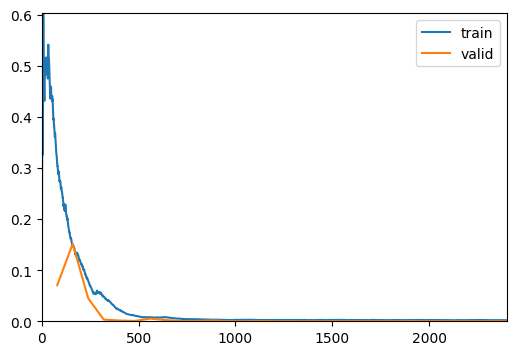

Better model found at epoch 2 with valid_loss value: 0.0447663888335228.
Better model found at epoch 3 with valid_loss value: 0.003369176760315895.
Better model found at epoch 4 with valid_loss value: 0.001473607961088419.
Better model found at epoch 5 with valid_loss value: 0.0006718062213622034.
Better model found at epoch 8 with valid_loss value: 0.0004674933443311602.
Better model found at epoch 11 with valid_loss value: 0.00034774310188367963.
Better model found at epoch 12 with valid_loss value: 0.00014627943164668977.
Better model found at epoch 16 with valid_loss value: 0.0001222698629135266.
Better model found at epoch 24 with valid_loss value: 5.419172521214932e-05.
Better model found at epoch 26 with valid_loss value: 4.660911508835852e-05.


In [21]:
learn.fit_flat_cos(30,lr=1e-3)

In [22]:
learn.unfreeze()

epoch,train_loss,valid_loss,mae,_rmse,mse,time
0,0.002271,0.000065,0.006696,0.008081,0.000065,00:33
1,0.002086,0.000094,0.007918,0.009709,0.000094,00:34
2,0.002143,0.000123,0.008880,0.011100,0.000123,00:32
3,0.002135,0.000135,0.009340,0.011627,0.000135,00:26
4,0.002231,0.000148,0.009663,0.012171,0.000148,00:26
5,0.002206,0.000181,0.011334,0.013439,0.000181,00:27
6,0.002226,0.000159,0.010678,0.012608,0.000159,00:26
7,0.002174,0.000147,0.010918,0.012131,0.000147,00:25
8,0.002282,0.000150,0.010378,0.012268,0.000150,00:22
9,0.002255,0.000170,0.011097,0.013054,0.000170,00:22


Better model found at epoch 0 with valid_loss value: 6.530663085868582e-05.


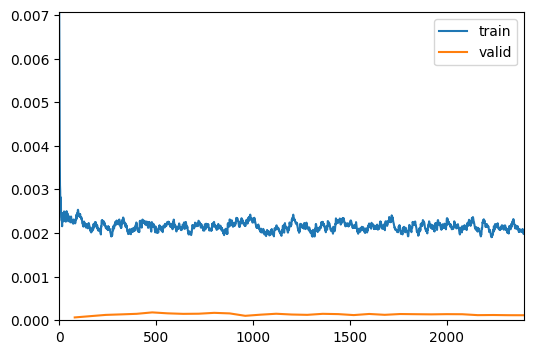

In [23]:
learn.fit_flat_cos(30,lr=1e-4)

In [24]:
dls = db.dataloaders(df,bs=4)

In [25]:
learn.dls=dls

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
preds,gt = learn.get_preds()

In [28]:
mean_absolute_error(gt*(10.55-0.8579)+0.8579,preds*(10.55-0.8579)+0.8579)

0.77002364

In [29]:
math.sqrt(mean_squared_error(gt*(10.55-0.8579)+0.8579,preds*(10.55-0.8579)+0.8579))

0.9130723595247133